In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kumar\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [11]:
# data_dir = 'C:\\Users\\kumar\\.cache\\kagglehub\\datasets\\msambare\\fer2013\\versions\\1'
data_dir = Path('C:\\Users\\kumar\\.cache\\kagglehub\\datasets\\msambare\\fer2013\\versions\\1')

train_dir = data_dir / "train"
test_dir = data_dir / "test"

# train_dir = "..\\input\\fer2013\\train" # Directory containing the training data
# test_dir = "..\\input\\fer2013\\test"  # Directory containing the validation data

print(f'Training directory {train_dir}')
print(f'Test directory {test_dir}')


Training directory C:\Users\kumar\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train
Test directory C:\Users\kumar\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test


In [12]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


#### CNN Model

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
import tensorflow as tf 

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

d:\src_git\LP\LP\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint # type: ignore

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

d:\src_git\LP\LP\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.1658 - loss: 2.9070
Epoch 1: val_accuracy improved from -inf to 0.23883, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 90s 246ms/step - accuracy: 0.1658 - loss: 2.9065 - val_accuracy: 0.2388 - val_loss: 1.9671
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
  1/359 ━━━━━━━━━━━━━━━━━━━━ 46s 130ms/step - accuracy: 0.1719 - loss: 2.6400

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
d:\src_git\LP\LP\venv\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2093 - loss: 2.4515
Epoch 3: val_accuracy improved from 0.23883 to 0.32263, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2093 - loss: 2.4514 - val_accuracy: 0.3226 - val_loss: 1.7585
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2454 - loss: 2.2476
Epoch 5: val_accuracy improved from 0.32263 to 0.38198, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.2454 - loss: 2.2475 - val_accuracy: 0.3820 - val_loss: 1.6774
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.2794 - loss: 2.1033
Epoch 7: val_accuracy improved from 0.38198 to 0.38338, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 35s 98ms/step - accuracy

ValueError: x and y must have same first dimension, but have shapes (50,) and (25,)

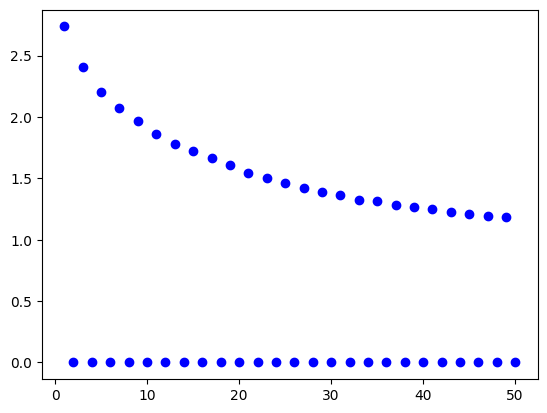

In [20]:
import matplotlib.pyplot as plt # type: ignore
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (25,)

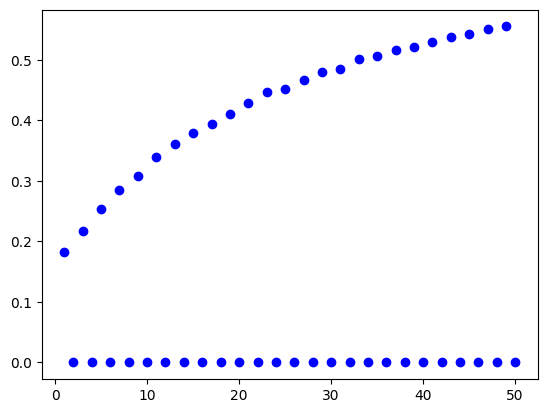

In [21]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


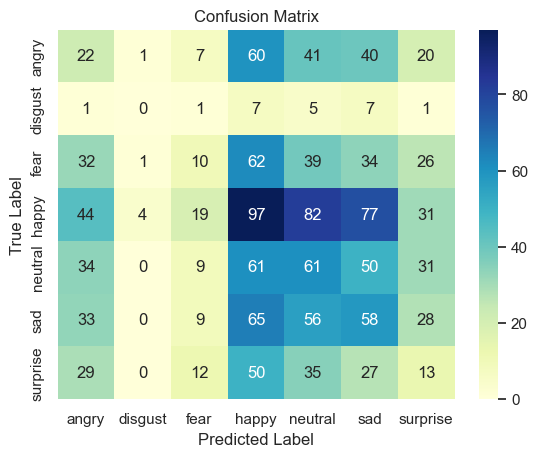

In [22]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()